In [8]:
#from dataLoader import train_dataset,Counter,tqdm,plt,random
import matplotlib.pyplot as plt
import torch
import kagglehub
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import random
import config
from source.dataLoader import load_dataset 

In [15]:
config.DATASET_TO_USE = "mvtec" # or "mvtec"
config.VAL_SPLIT=None
plot_img=True

In [16]:
if not os.path.exists(config.MVTEC_ROOT) and config.DATASET_TO_USE == 'mvtec':
    dataset_path = kagglehub.dataset_download(config.MVTEC_KAGGLE_DOWNLOAD_URL)
elif not os.path.exists(config.BTAD_ROOT) and config.DATASET_TO_USE == 'btad':
    dataset_path = kagglehub.dataset_download(config.BTAD_KAGGLE_DOWNLOAD_URL)
    dataset_path += "/BTech_Dataset_transformed"

print(f"Dataset loaded")

Dataset loaded


In [17]:
if config.DOWNLOAD_DATASET:
    DATASET = dataset_path
else:
    DATASET = config.MVTEC_ROOT if config.DATASET_TO_USE == 'mvtec' else config.BTAD_ROOT
    
train_dataset=None    
n_example_for_category=[]
categories = config.MVTEC_CATEGORIES if config.DATASET_TO_USE == 'mvtec' else config.BTAD_CATEGORIES

In [18]:
train_dataset=None    
n_example_for_category=[]
categories = config.MVTEC_CATEGORIES if config.DATASET_TO_USE == 'mvtec' else config.BTAD_CATEGORIES
for category in categories:
    print(f"Processing category: {category}")

    # Load the dataset
    train_loader,_,_= load_dataset(
        main_path=DATASET,
        transform_train=None,
        transform_gt=None,
        transform_test=None,
        class_selected=category
    )
    if plot_img:
        n_example_for_category.append(train_loader.dataset)
    else:
        n_example_for_category.append(len(train_loader.dataset))


Processing category: bottle


INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.
INFO: Identified 'good' as the normal sample folder.


Processing category: cable
Processing category: capsule
Processing category: carpet
Processing category: grid
Processing category: hazelnut
Processing category: leather
Processing category: metal_nut
Processing category: pill
Processing category: screw
Processing category: tile
Processing category: toothbrush
Processing category: transistor
Processing category: wood
Processing category: zipper


# EDA of MVTEC-AD
---

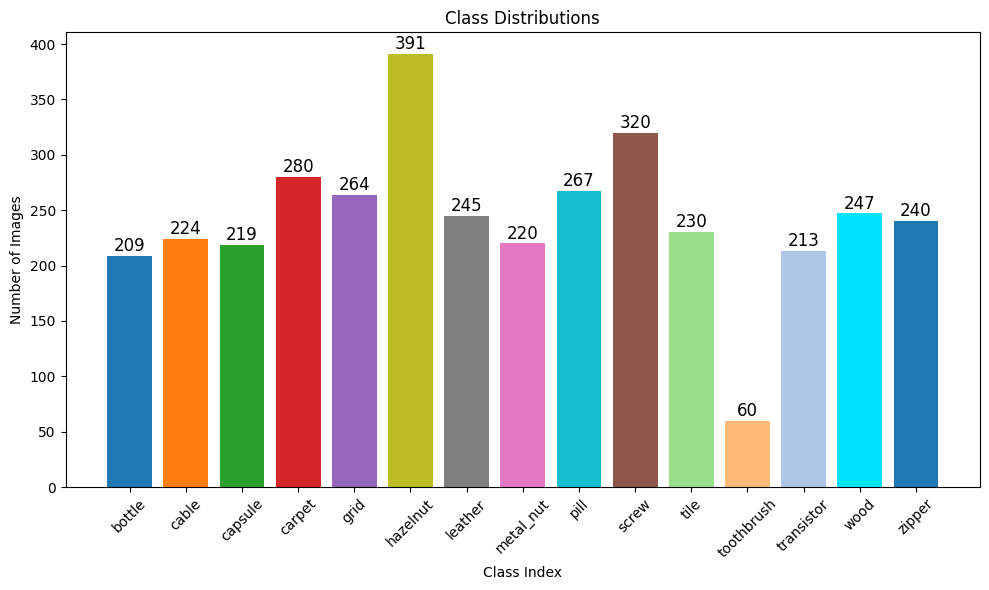

In [6]:
plt.figure(figsize=(10, 6))
palette = [
    "#1f77b4",  
    "#ff7f0e",  
    "#2ca02c", 
    "#d62728",  
    "#9467bd", 
    "#bcbd22",  
    "#7f7f7f",  
    "#e377c2", 
    "#17becf",  
    "#8c564b",  
    "#98df8a",  
    "#ffbb78", 
    "#aec7e8", 
    "#00e5ff"  
    
]

bars=plt.bar(categories ,n_example_for_category,color=palette)
for bar, count in zip(bars,n_example_for_category):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, str(count), ha='center', va='bottom', fontsize=12)
plt.xticks(categories,rotation=45)
plt.xlabel("Class Index")
plt.ylabel("Number of Images")
plt.title("Class Distributions")
plt.tight_layout()
plt.show()

# EDA of BTAD
---

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


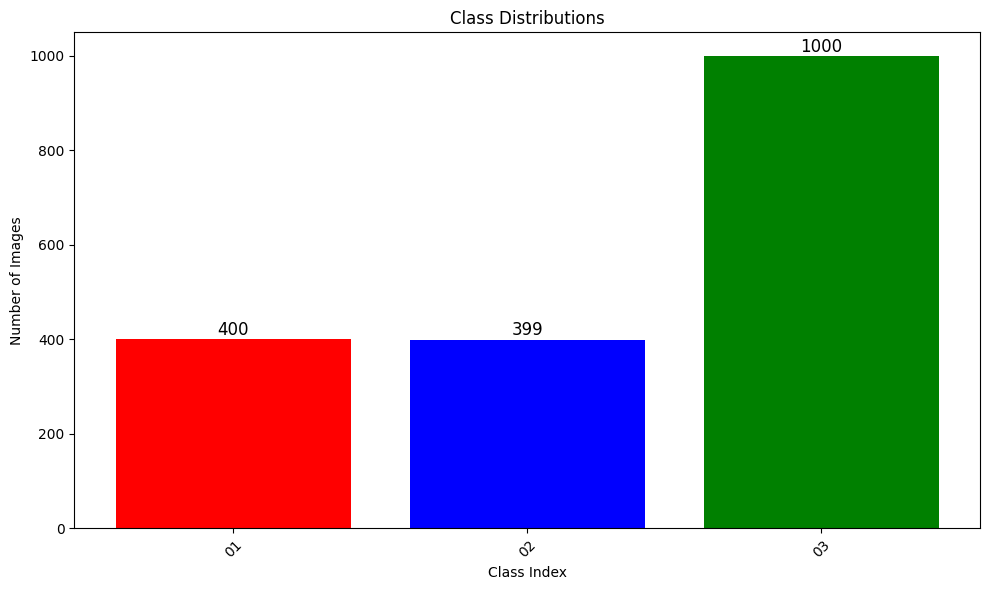

In [7]:
plt.figure(figsize=(10, 6))
palette=['red','blue','green']
bars=plt.bar(categories ,n_example_for_category,color=palette)
for bar, count in zip(bars,n_example_for_category):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, str(count), ha='center', va='bottom', fontsize=12)
plt.xticks(categories,rotation=45)
plt.xlabel("Class Index")
plt.ylabel("Number of Images")
plt.title("Class Distributions")
plt.tight_layout()
plt.show()

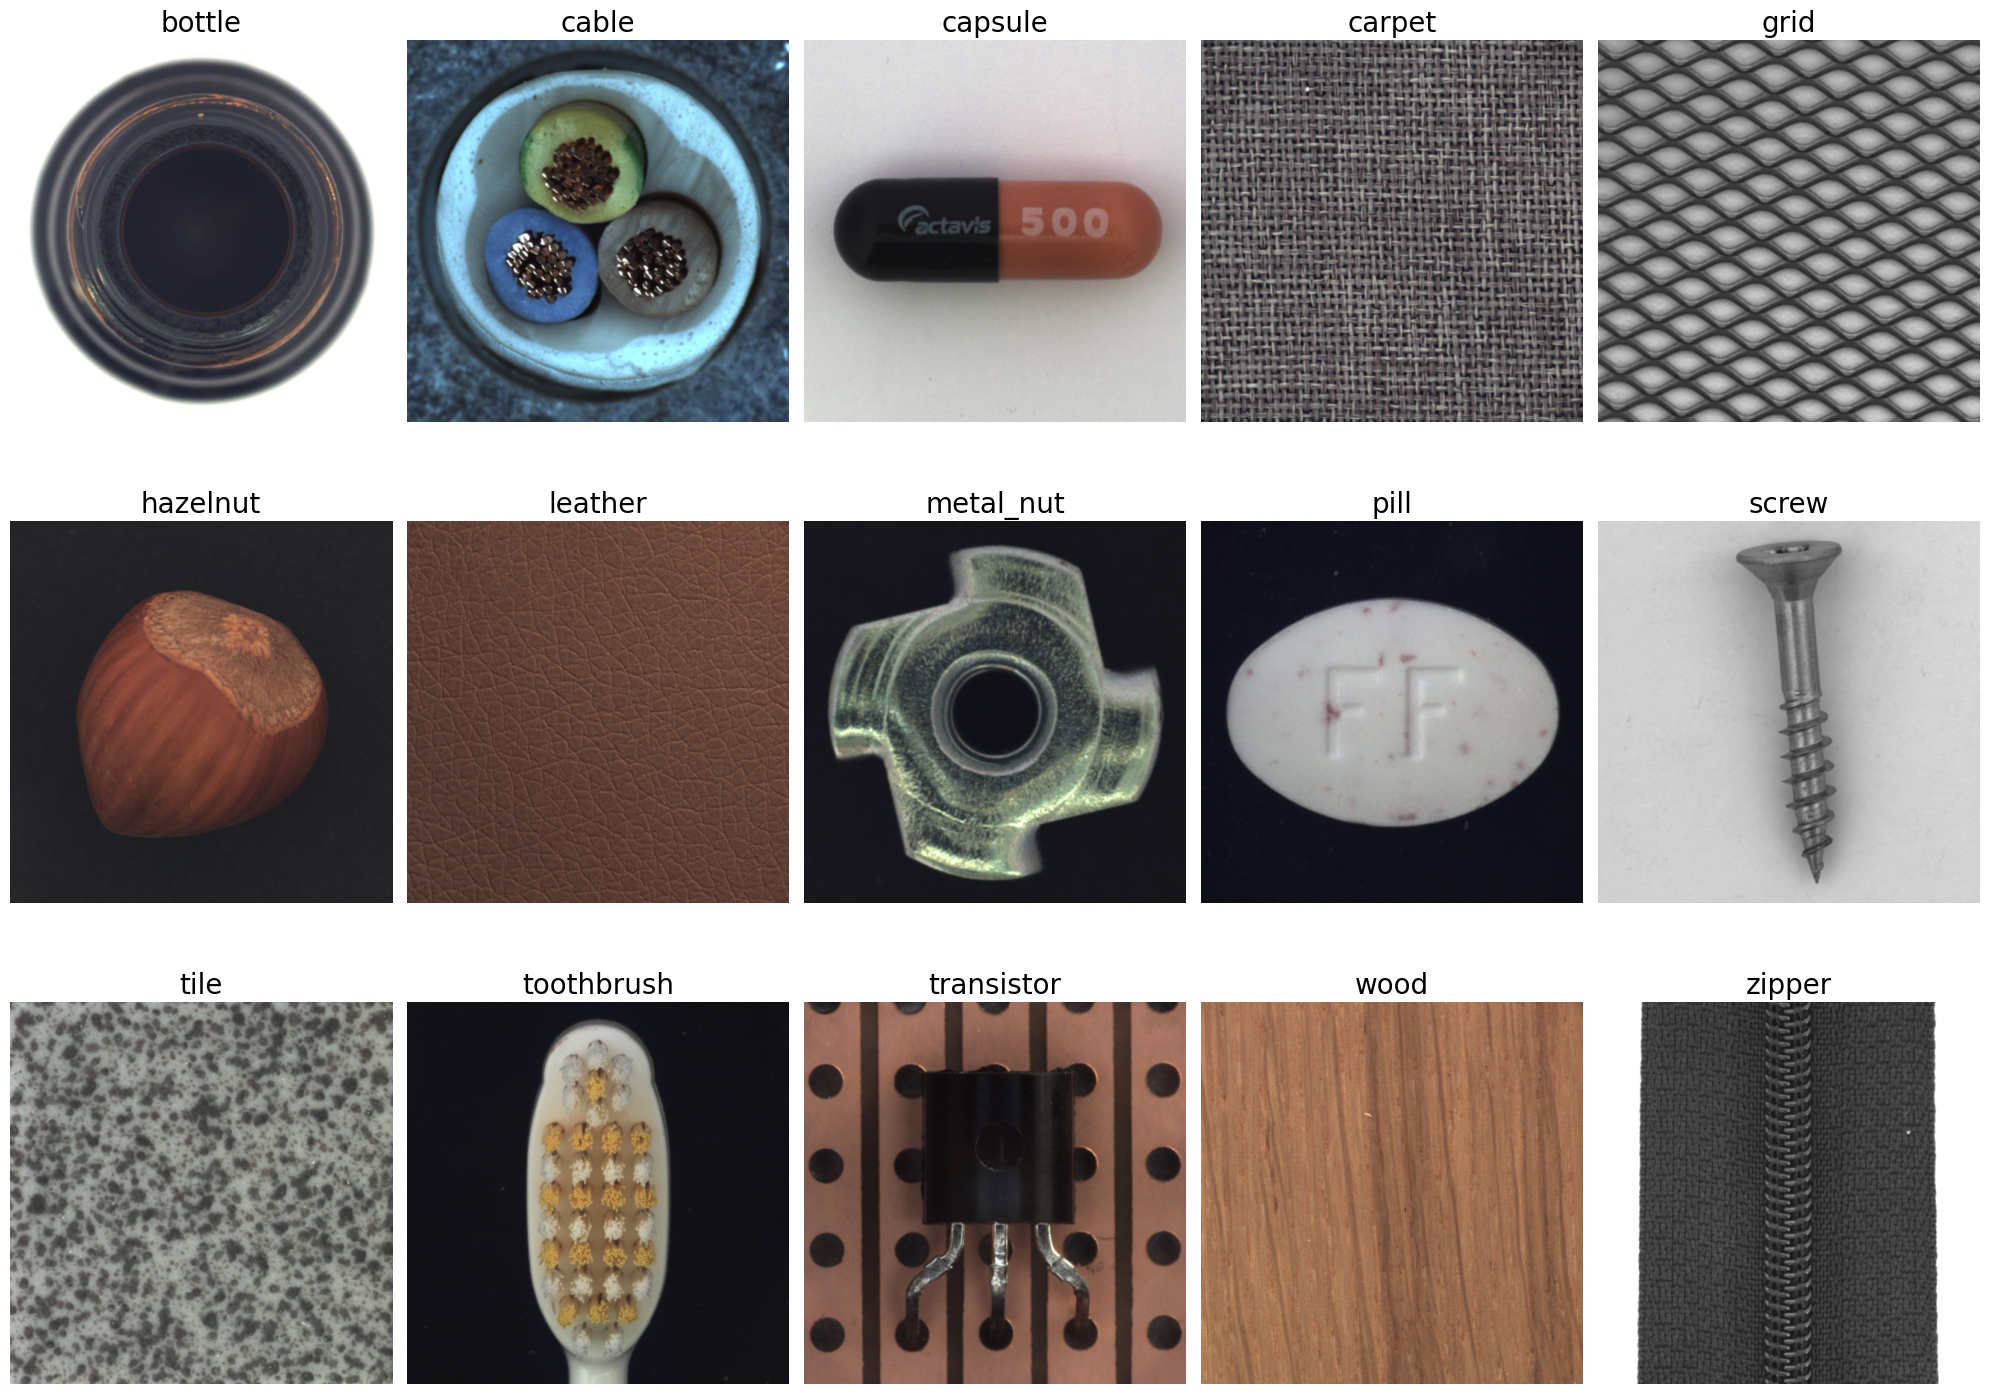

In [ ]:
def choose_sample_per_class(dataset):
    random.seed(42)
    idx_r=random.randint(0,len(dataset)-1)
    img,_,_=dataset[idx_r]
    return img
def show_sample(dataset,classes):
    all_img=[]
    i=0
    for c in range(0,len(classes)):
        all_img.append(choose_sample_per_class(dataset[c]))
    
    if len(classes)!=15:
        fig, axes = plt.subplots(1,3, figsize=(20,15))
    else:    
        fig, axes = plt.subplots(3,5, figsize=(20,15))
    axes = axes.flatten() 
    i=0
    for img in all_img:
        img = img.permute(1, 2, 0).cpu().numpy()
        
        axes[i].imshow(img)
        axes[i].set_title(classes[i],fontdict={'fontsize': 20})
        axes[i].axis("off")
        i+=1
    plt.tight_layout()
    plt.show()
    
show_sample(n_example_for_category,categories)         
    